## 1. 사진 가져오기

In [2]:
import os
import dlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import cv2
from PIL import Image

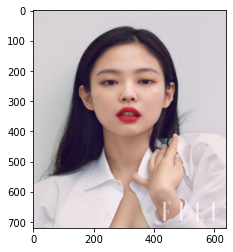

In [3]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.png'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 720))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  # RGB 이미지로 변경
plt.imshow(img_rgb)
plt.show()

## 2. Face Detection

In [4]:
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

rectangles[[(171, 171) (438, 439)]]


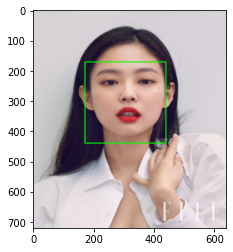

In [6]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 3. Face Landmark

In [7]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [8]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


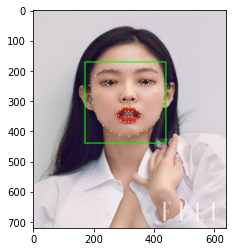

In [9]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 4. 스티커 적용하기

### (1) 스티커 위치 및 크기 계산

In [10]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 중심점 좌표 확인(nose center index: 30)
    x = landmark[30][0]
    y = landmark[30][1]
    w = (dlib_rect.width())//2
    h = (dlib_rect.width())//2
    print ('(x,y) : (%d,%d)'%(x,y))  # 스티커의 위치 (x,y)
    print ('(w,h) : (%d,%d)'%(w,h))  # 스티커의 크기 (w,h)

(315, 279)
(x,y) : (315,279)
(w,h) : (134,134)


### (2) 스티커 resize, 위치좌표 조정

(134, 134, 3)


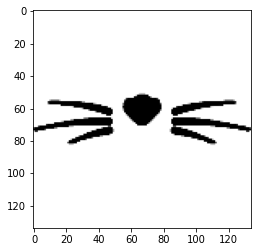

In [11]:
# 스티커 이미지를 읽어와 윗 단계에서 계산한 크기로 resize
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

plt.imshow(img_sticker)
plt.show()

In [12]:
# 이미지 시작점인 top-left 좌표로 x, y 좌표 변경
refined_x = x - w // 2  # left
refined_y = y - h // 2  # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (248,212)


### (3) 스티커 적용

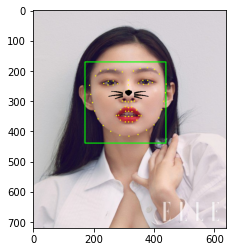

In [13]:
# 원본 이미지에 스티커 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

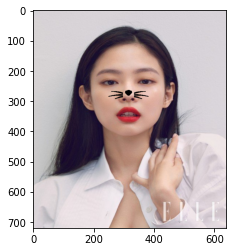

In [14]:
# bounding box와 landmark를 제거하고 최종 결과만 출력
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))  # img_show 대신 아껴 두었던 img_rgb 사용
plt.show()

## 5. 다양한 이미지에 적용

rectangles[[(82, 112) (349, 379)]]


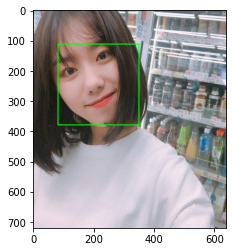

In [15]:
# 원본 이미지 불러오기
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/sohye.png'
img_bgr = cv2.imread(my_image_path)  # OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 720))    # Resize
img_show = img_bgr.copy()      # 출력용 이미지 별도 카피

# Face Detection
detector_hog = dlib.get_frontal_face_detector()   # dlib을 활용해 hog detector를 선언
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  # dlib은 rgb 이미지를 입력으로 받음
dlib_rects = detector_hog(img_rgb, 1)   # detector를 이용해서 얼굴의 bounding box를 추출

print(dlib_rects)   # 얼굴 영역 좌표 출력

# 이미지 위에 얼굴의 bounding box 출력
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

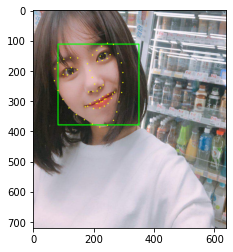

In [16]:
# landmark 모델 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

# landmark 개별 위치 저장
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

# 이미지에 landmark 출력
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

(203, 244)
(x,y) : (203,244)
(w,h) : (268,268)
(x,y) : (69,110)


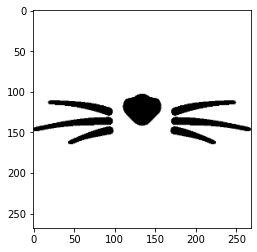

In [17]:
# 스티커 위치 및 크기 계산
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 중심점 좌표 확인(nose center index: 30)
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))  # 스티커의 위치 (x,y)
    print ('(w,h) : (%d,%d)'%(w,h))  # 스티커의 크기 (w,h)

# 스티커 이미지를 읽어와 윗 단계에서 계산한 크기로 resize
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

plt.imshow(img_sticker)
plt.show
# 이미지 시작점인 top-left 좌표로 x, y 좌표 변경
refined_x = x - w // 2  # left
refined_y = y - h // 2  # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

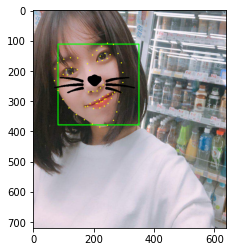

In [58]:
# 원본 이미지에 스티커 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

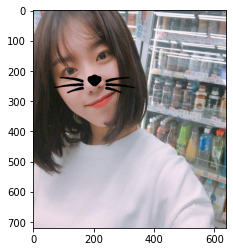

In [52]:
# bounding box와 landmark를 제거하고 최종 결과 출력
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))  # img_show 대신 img_rgb 사용
plt.show()

## 6. 정리

### 스티커 적용 옵션
* 스티커 위치 설정 : 고양이 스티커의 코 부분과 사람의 코 위치를 일치시키기 위해 landmark[30]을 중심으로 설정

* 스티커 좌표 설정 : 이미지의 시작점은 x에서 너비의 1/2만큼 뺀 값, y에서 높이의 1/2만큼 뺀 값으로 좌표를 재설정


### 다양한 이미지에 적용해보기

* 각도가 조금 바뀐 사진 : 사진에 알맞게 적용되지는 않았지만 정확히 코 부분에 위치하게 적용됐다.

* 각도가 많이 바뀐 사진 : 각도가 많이 바뀌었더라도 이목구비를 알아볼 수 있는 정도라면 스티커 적용에 문제가 없다.

* 피부색이 다른 사진: 피부색이 다른 경우에도 Face Detection이나 Face Landmark 적용에는 문제가 없었다.

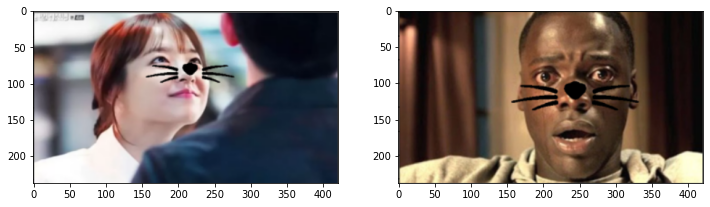

In [35]:
boyoung = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat_boyoung.png'
getout = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat_getout.png'
boyoung_bgr = cv2.imread(boyoung)
boyoung_rgb = cv2.cvtColor(boyoung_bgr, cv2.COLOR_BGR2RGB)
getout_bgr = cv2.imread(getout)
getout_rgb = cv2.cvtColor(getout_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.imshow(boyoung_rgb)

plt.subplot(1,2,2)
plt.imshow(getout_rgb)

plt.show()